# CaptainCook4D: Mistake Detection - V1 and V2 Baselines Reproduction and Comparison

## Part (a): Reproducing V1 and V2 Baselines and Performance Analysis

This section reproduces the official V1 (MLP) and V2 (Transformer) baselines from the CaptainCook4D project for mistake detection in cooking videos, and analyzes their performance across different error types.

**Objectives:**
- Evaluate V1 baseline (MLP models) on both step-level and recording-level splits
- Evaluate V2 baseline (Transformer model) on both step-level and recording-level splits
- Analyze error detection performance per error category
- Compare model performance across different types of cooking mistakes

**Dataset and Features:**
- Binary classification task: Error vs. Normal steps
- Features: Pre-extracted Omnivore model embeddings (1024-dimensional)
- Splits: Step-level and recording-level evaluation
- Backbone: Omnivore multimodal model

**Baseline Models:**
- **V1 MLP**: Multi-layer perceptron classifier
- **V2 Transformer**: Transformer-based sequential model

## Part (b): Proposed Baseline - LSTM Model

This section proposes a new LSTM-based baseline trained from scratch and compares it with the existing V1 and V2 baselines.

**Objectives:**
- Implement and train an LSTM model using Omnivore features
- Train on the CaptainCook4D training set
- Evaluate on both step-level and recording-level sets
- Compare model performance across different types of cooking mistakes

In [ ]:
# Mount Google Drive for accessing project data and checkpoints
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# Clone the project repository recursively to get all dependencies
!git clone --recursive https://github.com/sapeirone/aml-2025-mistake-detection.git code

Cloning into 'code'...
remote: Enumerating objects: 437, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 437 (delta 5), reused 5 (delta 5), pack-reused 428 (from 1)
Receiving objects: 100% (437/437), 106.53 KiB | 924.00 KiB/s, done.
Resolving deltas: 100% (286/286), done.
Submodule 'annotations' (https://github.com/CaptainCook4D/annotations) registered for path 'annotations'
Cloning into '/content/code/annotations'...
remote: Enumerating objects: 152, done.        
remote: Counting objects: 100% (152/152), done.        
remote: Compressing objects: 100% (98/98), done.        
remote: Total 152 (delta 75), reused 108 (delta 46), pack-reused 0 (from 0)        
Receiving objects: 100% (152/152), 793.14 KiB | 3.24 MiB/s, done.
Resolving deltas: 100% (75/75), done.
Submodule path 'annotations': checked out '0e9a108be2cbcbcbd592e7418c0ab9c16232d27a'


In [ ]:
# Change to project directory
%cd code

/content/code


In [ ]:
import os

# Create necessary directories for data and checkpoints
!mkdir -p code/data/video
!mkdir -p code/checkpoints

# Extract pre-trained checkpoints for V1 baseline models
print("Extracting pre-trained checkpoints...")
!unzip -q "/content/drive/MyDrive/AML_Project/First_Part/error_recognition_best.zip" -d code/checkpoints/

# Extract Omnivore video features
print("Extracting Omnivore video features...")
!unzip -q "/content/drive/MyDrive/AML_Project/First_Part/features/omnivore.zip" -d code/data/video/

Decompressione checkpoints in corso...
Decompressione features Omnivore in corso...


In [ ]:
# Install project dependencies
# Remove torch from requirements since it's already installed in Colab
!sed -i '/torch/d' requirements.txt
!pip install torcheval
!pip install -r requirements.txt

# Sync checkpoints and data to current working directory
!rsync -a code/checkpoints/ checkpoints/
!rsync -a code/data/ data/
!rm -rf code

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.2/179.2 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 454.4/454.4 kB 21.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.6/61.6 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 78.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.2/144.2 kB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.5/92.5 kB 9.9 MB/s eta 0:00:00
  Created wheel for gcloud: filename=gcloud-0.18.3-py3-none-any.whl size=602927 sha256=001a245e695ec50ebbe095bb9405c2c1446f69acfc92a2e1b0976a4aa1f77fca
  Stored in directory: /root/.cache/pip/wheels/2a/62/75/3d74209bfebb8805823ae74afa28653aa1ea76d8b5a9d741ff
Successfully built gcloud
  Attempting uninstall: urllib3
    Found

In [ ]:
# Part (a): V1 Baseline - MLP Model Evaluation
# Evaluate V1 baseline on step-level split
!python -m core.evaluate \
  --variant MLP \
  --backbone omnivore \
  --ckpt checkpoints/error_recognition_best/MLP/omnivore/error_recognition_MLP_omnivore_step_epoch_43.pt \
  --split step \
  --threshold 0.6

# Evaluate V1 baseline on recording-level split
!python -m core.evaluate \
--variant MLP \
--backbone omnivore \
--ckpt checkpoints/error_recognition_best/MLP/omnivore/error_recognition_MLP_omnivore_recordings_epoch_33.pt \
--split recordings \
--threshold 0.4

In [ ]:
# Part (a): V2 Baseline - Transformer Model Evaluation
# Evaluate V2 baseline on recording-level split
!python -m core.evaluate \
  --variant Transformer \
  --backbone omnivore \
  --ckpt checkpoints/error_recognition_best/Transformer/omnivore/error_recognition_Transformer_omnivore_recordings_epoch_31.pt \
  --split recordings \
  --threshold 0.4

# Evaluate V2 baseline on step-level split
!python -m core.evaluate \
  --variant Transformer \
  --backbone omnivore \
  --ckpt checkpoints/error_recognition_best/Transformer/omnivore/error_recognition_Transformer_omnivore_step_epoch_9.pt \
  --split step \
  --threshold 0.6

In [ ]:
# Import required libraries for training and evaluation
import sys
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from core.config import Config
from base import fetch_model
from dataloader.CaptainCookStepDataset import CaptainCookStepDataset, collate_fn
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score, confusion_matrix

In [ ]:
# Part (a): Error Analysis for V1 and V2 Baselines
# Detailed performance evaluation per error type

old_sys_argv = sys.argv
sys.argv = [sys.argv[0]]

def analyze_error_types(config, threshold=0.6):
    """
    Analyzes and reports error detection performance per error type.

    Evaluates the model on each error category and computes recall metrics.
    This provides insights into which types of cooking mistakes are easier
    or harder to detect for the given baseline model.

    Args:
        config: Configuration object containing model and dataset parameters
        threshold: Decision threshold for binary classification (default: 0.6)

    Returns:
        DataFrame with recall statistics for each error type (total samples and detected count)
    """
    # 1. Setup device and load model
    device = config.device
    model = fetch_model(config)

    print(f"Loading checkpoint: {config.ckpt}")
    model.load_state_dict(torch.load(config.ckpt))
    model.eval()

    # 2. Initialize test dataset
    dataset = CaptainCookStepDataset(config, phase='test', split='step')
    loader = DataLoader(dataset, batch_size=1, shuffle=False, collate_fn=collate_fn)

    # Error type mapping
    error_map = dataset._error_category_label_name_map

    # Statistics per error type
    error_stats = {name: {'total': 0, 'detected': 0} for name in error_map.values()}
    error_stats['Total Errors'] = {'total': 0, 'detected': 0}

    print(f"Starting error analysis on {len(dataset)} steps...")

    with torch.no_grad():
        for idx, (data, target) in enumerate(tqdm(loader)):
            data = data.to(device)

            # Model inference
            output = model(data)
            sigmoid_output = output.sigmoid().cpu().numpy().reshape(-1)

            step_score = np.mean(sigmoid_output)
            is_predicted_error = step_score > threshold

            # Ground truth label
            is_ground_truth_error = target.float().mean().item() > 0.95

            if is_ground_truth_error:
                step_info = dataset._step_dict[idx]
                step_details = step_info[1][0]
                error_labels = step_details[3]

                error_stats['Total Errors']['total'] += 1
                if is_predicted_error:
                    error_stats['Total Errors']['detected'] += 1

                for err_id in error_labels:
                    if err_id in error_map:
                        err_name = error_map[err_id]
                        error_stats[err_name]['total'] += 1
                        if is_predicted_error:
                            error_stats[err_name]['detected'] += 1

    # Generate report
    results = []
    for err_name, stats in error_stats.items():
        total = stats['total']
        detected = stats['detected']
        recall = (detected / total * 100) if total > 0 else 0.0
        results.append({
            "Error Type": err_name,
            "Total Samples": total,
            "Detected": detected,
            "Recall (%)": round(recall, 2)
        })

    return pd.DataFrame(results)

# Initialize configuration
conf = Config()

sys.argv = old_sys_argv

# Analyze V1 (MLP) baseline performance per error type
conf.split = "step"
conf.backbone = "omnivore"
conf.variant = "MLP"
conf.device = "cuda" if torch.cuda.is_available() else "cpu"

conf.ckpt = "checkpoints/error_recognition_best/MLP/omnivore/error_recognition_MLP_omnivore_step_epoch_43.pt"

df_results = analyze_error_types(conf, threshold=0.6)
print("\n--- Part (a): V1 Baseline (MLP) - Error Detection Performance by Type ---")
print(df_results)

# Part (b): Proposed Baseline - LSTM Model Implementation and Training

This section implements and trains a new LSTM-based baseline from scratch using Omnivore features.
The trained LSTM model will be compared with the official V1 (MLP) and V2 (Transformer) baselines.

## LSTM Model Architecture

- **Input**: Pre-extracted Omnivore video features (1024-dimensional embeddings)
- **Sequence Processing**: Single-layer LSTM (512 hidden units)
- **Regularization**: Dropout (0.5) to prevent overfitting
- **Output**: Binary classification logits (error vs. normal step)

## Training Configuration

- **Loss Function**: Binary Cross-Entropy with positive class weighting (2.5x)
- **Optimizer**: Adam with learning rate 1e-5 and weight decay 1e-4
- **Early Stopping**: Based on validation AUC
- **Batch Size**: 1 (as per CaptainCook4D baseline)
- **Training Epochs**: Up to 20 (with early stopping)

## Evaluation

- Metrics: Accuracy, F1-Score, AUC-ROC, Confusion Matrix
- Per-error-type recall analysis for comparison with V1 and V2
- Both step-level and recording-level split evaluation

In [ ]:
old_sys_argv = sys.argv
sys.argv = [sys.argv[0]]

# Initialize configuration
conf = Config()

sys.argv = old_sys_argv

# Part (b): Define LSTM model for proposed baseline
class LSTMModel(nn.Module):
    """
    LSTM-based model for sequential error detection in cooking videos.

    This model processes Omnivore feature sequences using LSTM to capture
    temporal dependencies for improved error classification. It serves as
    the proposed baseline to be compared with V1 (MLP) and V2 (Transformer).

    Args:
        input_dim: Feature dimension (1024 for Omnivore embeddings)
        hidden_dim: LSTM hidden state dimension (512)
        num_layers: Number of LSTM layers (1)
        output_dim: Output dimension for binary classification (1)
        dropout_prob: Dropout probability for regularization (0.5)

    Attributes:
        lstm: LSTM layer for sequence processing
        dropout: Dropout layer for regularization
        fc: Fully connected layer for binary classification
    """
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim=1, dropout_prob=0.5):
        super(LSTMModel, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        self.dropout = nn.Dropout(p=dropout_prob)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        """
        Forward pass through LSTM and classification layers.

        Args:
            x: Input tensor of Omnivore features

        Returns:
            Logits for binary classification
        """
        x = x.unsqueeze(0)
        _, (h_n, _) = self.lstm(x)
        last_hidden = h_n[-1, :, :]
        out = self.dropout(last_hidden)
        out = self.fc(out)
        return out.squeeze(0)

# Setup configuration parameters
conf.split = "step" # otherwise recordings
conf.backbone = "omnivore"
conf.device = "cuda" if torch.cuda.is_available() else "cpu"
conf.batch_size = 1

# LSTM hyperparameters for the proposed baseline
INPUT_DIM = 1024  # Omnivore feature dimension
HIDDEN_DIM = 512  # LSTM hidden dimension
NUM_LAYERS = 1    # Single LSTM layer
NUM_EPOCHS = 20   # Maximum training epochs (with early stopping)
WEIGHT_DECAY = 1e-4  # L2 regularization
WEIGHTED_LOSS = 2.5  # Positive class weight (for class imbalance)
BATCH_SIZE = 1    # Batch size (consistent with baselines)
DROPOUT = 0.5     # Dropout probability
LR = 1e-5         # Learning rate
THRESHOLD = 0.4   # Decision threshold for binary classification
GENERAL_PATH = "../drive/MyDrive/AML_Project/First_Part/models_result_omnivore/lstm_step" #otherwise /lstm_recordings

In [ ]:
# Part (b): Prepare training and validation datasets
print(f"Loading '{conf.split}' dataset...")
train_dataset = CaptainCookStepDataset(conf, phase='train', split='step') #otherwise recordings

# Use test set as validation set for training monitoring
val_dataset = CaptainCookStepDataset(conf, phase='test', split='step') #otherwise recordings

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, collate_fn=collate_fn)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False, collate_fn=collate_fn)

# Initialize LSTM model with dropout regularization
model = LSTMModel(INPUT_DIM, HIDDEN_DIM, NUM_LAYERS, dropout_prob=DROPOUT).to(conf.device)

# Loss function: Binary Cross-Entropy with positive class weighting to handle class imbalance
pos_weight = torch.tensor([WEIGHTED_LOSS]).to(conf.device)
criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight)

# Optimizer: Adam with weight decay for L2 regularization
optimizer = optim.Adam(model.parameters(), lr=LR, weight_decay=WEIGHT_DECAY)

print(f"LSTM model initialized on {conf.device}. Starting training for {NUM_EPOCHS} epochs.")

Caricamento dataset 'step'...
Loaded annotations...... 
Loading recording ids from recordings_combined_splits.json
Loaded annotations...... 
Loading recording ids from recordings_combined_splits.json
Modello LSTM inizializzato su cuda. Inizio training per 20 epoche.


EPOCH  | TR LOSS  | TR ACC   | VAL LOSS | VAL AUC  | VAL F1   | VAL ACC  | STATUS    


1      | 0.9966   | 0.3134   | 0.9886   | 0.6120   | 0.4798   | 0.3233   | SAVED (*)


2      | 0.9514   | 0.3742   | 0.9678   | 0.6463   | 0.5012   | 0.4787   | SAVED (*)


3      | 0.8864   | 0.5144   | 0.9308   | 0.6843   | 0.5214   | 0.5376   | SAVED (*)


4      | 0.8109   | 0.6178   | 0.9038   | 0.7222   | 0.5357   | 0.5025   | SAVED (*)


5      | 0.7210   | 0.6831   | 0.8814   | 0.7399   | 0.5592   | 0.5752   | SAVED (*)


6      | 0.6317   | 0.7276   | 0.8851   | 0.7566   | 0.5842   | 0.6629   | SAVED (*)


7      | 0.5420   | 0.7830   | 0.8949   | 0.7627   | 0.5968   | 0.6529   | SAVED (*)


8      | 0.4559   | 0.8302   | 0.9580   | 0.7649   | 0.5966   | 0.6729   | SAVED (*)


9      | 0.3710   | 0.8606   | 1.0362   | 0.7555   | 0.5864   | 0.6642   | 


10     | 0.2886   | 0.8947   | 1.1358   | 0.7659   | 0.5846   | 0.6955   | SAVED (*)


11     | 0.2406   | 0.9171   | 1.1893   | 0.7591   | 0.5943   | 0.6767   | 


12     | 0.1904   | 0.9387   | 1.2969   | 0.7661   | 0.5928   | 0.7005   | SAVED (*)


13     | 0.1604   | 0.9518   | 1.3305   | 0.7682   | 0.5848   | 0.7118   | SAVED (*)


14     | 0.1268   | 0.9648   | 1.6084   | 0.7626   | 0.5595   | 0.7080   | 


15     | 0.1094   | 0.9728   | 1.4733   | 0.7648   | 0.5969   | 0.6767   | 


16     | 0.0997   | 0.9755   | 1.5852   | 0.7609   | 0.5730   | 0.7068   | 


17     | 0.0861   | 0.9773   | 1.6155   | 0.7643   | 0.5714   | 0.7030   | 


18     | 0.0583   | 0.9872   | 1.8026   | 0.7571   | 0.5553   | 0.7130   | 


19     | 0.0572   | 0.9877   | 2.1207   | 0.7680   | 0.5657   | 0.7306   | 


20     | 0.0652   | 0.9835   | 1.6374   | 0.7652   | 0.5809   | 0.7143   | 
Training completato. Best Val AUC: 0.7682

Generazione grafici in corso...


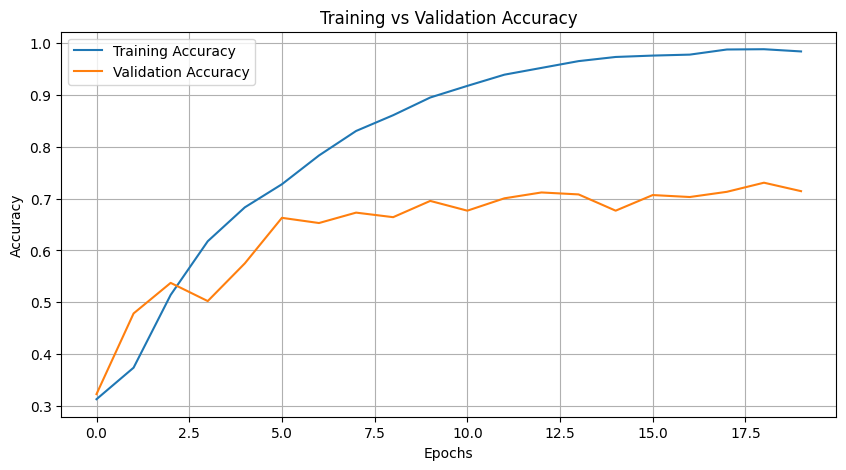

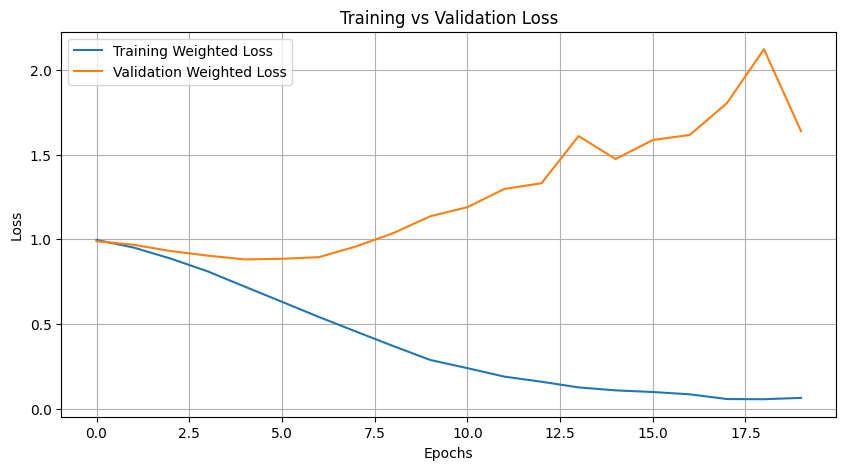

Grafici salvati come 'accuracy_plot.png' e 'loss_plot.png'.


In [ ]:
os.makedirs(GENERAL_PATH, exist_ok=True)

# Part (b): Training loop for LSTM baseline
# Setup logging and metrics tracking
best_val_auc = 0.0
save_path = f"{GENERAL_PATH}/model.pt"

# Dictionary to store metrics history for visualization
history = {
    'train_loss': [], 'val_loss': [],
    'train_acc': [], 'val_acc': []
}

# Print header for training log
header = f"{'EPOCH':<6} | {'TR LOSS':<8} | {'TR ACC':<8} | {'VAL LOSS':<8} | {'VAL AUC':<8} | {'VAL F1':<8} | {'VAL ACC':<8} | {'STATUS':<10}"
print(f"{'='*len(header)}")
print(header)
print(f"{'='*len(header)}")

# Training loop: iterate over epochs
for epoch in range(NUM_EPOCHS):
    model.train()
    train_loss = 0

    # Training accumulators for metrics computation
    train_preds_bin = []
    train_targets = []
    for data, target in tqdm(train_loader, desc=f"Ep {epoch+1} Train", leave=False):
        data, target = data.to(conf.device), target.to(conf.device)

        optimizer.zero_grad()
        output = model(data)

        # Binarize target based on majority of labels
        target_scalar = torch.tensor([1.0 if target.mean() > 0.95 else 0.0], device=conf.device).view_as(output)

        loss = criterion(output, target_scalar)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

        # Collect predictions for accuracy calculation
        prob = torch.sigmoid(output).item()
        train_targets.append(target_scalar.item())
        train_preds_bin.append(1 if prob > THRESHOLD else 0)

    # Compute training metrics
    avg_train_loss = train_loss / len(train_loader)
    train_acc = accuracy_score(train_targets, train_preds_bin)

    # Store metrics history
    history['train_loss'].append(avg_train_loss)
    history['train_acc'].append(train_acc)

    # Validation phase: evaluate on validation set
    model.eval()
    val_loss = 0
    val_preds_prob = []
    val_preds_bin = []
    val_targets = []

    with torch.no_grad():
        for data, target in val_loader:
            data = data.to(conf.device)
            target_scalar = torch.tensor([1.0 if target.mean() > 0.95 else 0.0], device=conf.device).view_as(output)

            output = model(data)

            # Compute validation loss
            v_loss = criterion(output, target_scalar)
            val_loss += v_loss.item()

            prob = torch.sigmoid(output).item()
            val_preds_prob.append(prob)
            val_targets.append(target_scalar.item())
            val_preds_bin.append(1 if prob > THRESHOLD else 0)

    # Compute validation metrics
    avg_val_loss = val_loss / len(val_loader)
    try:
        val_auc = roc_auc_score(val_targets, val_preds_prob)
    except ValueError:
        val_auc = 0.5
    val_f1 = f1_score(val_targets, val_preds_bin)
    val_acc = accuracy_score(val_targets, val_preds_bin)

    # Store metrics history
    history['val_loss'].append(avg_val_loss)
    history['val_acc'].append(val_acc)

    # Save best model based on validation AUC (early stopping criterion)
    save_status = ""
    if val_auc > best_val_auc:
        best_val_auc = val_auc
        torch.save(model.state_dict(), save_path)
        save_status = "SAVED (*)"

    # Print epoch log
    print(f"{epoch+1:<6} | {avg_train_loss:.4f}   | {train_acc:.4f}   | {avg_val_loss:.4f}   | {val_auc:.4f}   | {val_f1:.4f}   | {val_acc:.4f}   | {save_status}")

print(f"{'='*len(header)}")
print(f"Training completed. Best Val AUC: {best_val_auc:.4f}")

# Generate training visualization plots
print("\nGenerating training plots...")

# Plot 1: Accuracy comparison (Train vs Validation)
plt.figure(figsize=(10, 5))
plt.plot(history['train_acc'], label='Training Accuracy')
plt.plot(history['val_acc'], label='Validation Accuracy')
plt.title('LSTM Baseline: Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.savefig(f'{GENERAL_PATH}/accuracy_plot.png')
plt.show()

# Plot 2: Loss comparison (Train vs Validation)
plt.figure(figsize=(10, 5))
plt.plot(history['train_loss'], label='Training Weighted Loss')
plt.plot(history['val_loss'], label='Validation Weighted Loss')
plt.title('LSTM Baseline: Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.savefig(f'{GENERAL_PATH}/loss_plot.png')
plt.show()

print("Training plots saved as 'accuracy_plot.png' and 'loss_plot.png'.")

In [ ]:
old_sys_argv = sys.argv
sys.argv = [sys.argv[0]]

def analyze_error_types_lstm_complete(config, threshold=0.4):
    """
    Comprehensive error analysis for trained LSTM model.

    Evaluates the proposed LSTM baseline and computes detailed metrics:
    - Global performance metrics (Accuracy, F1-Score, AUC-ROC)
    - Confusion matrix with TN, FP, FN, TP counts
    - Per-error-type recall analysis for comparison with V1 and V2 baselines

    These metrics enable direct comparison between the proposed LSTM baseline
    and the official V1 (MLP) and V2 (Transformer) baselines.

    Args:
        config: Configuration object with model and dataset parameters
        threshold: Decision threshold for binary classification (default: 0.4)

    Returns:
        DataFrame containing all evaluation metrics, confusion matrix details,
        and per-error-type recall statistics
    """
    device = config.device

    model = LSTMModel(input_dim=INPUT_DIM, hidden_dim=HIDDEN_DIM, num_layers=NUM_LAYERS, dropout_prob=DROPOUT)

    print(f"Loading trained checkpoint: {config.ckpt}")
    model.load_state_dict(torch.load(config.ckpt))
    model.to(device)
    model.eval()

    # Load test dataset at step level for evaluation
    dataset = CaptainCookStepDataset(config, phase='test', split='step') # otherwise recordings
    loader = DataLoader(dataset, batch_size=1, shuffle=False, collate_fn=collate_fn)

    error_map = dataset._error_category_label_name_map

    # Statistics per error type
    error_stats = {name: {'total': 0, 'detected': 0} for name in error_map.values()}
    error_stats['Total Errors (Recall Only)'] = {'total': 0, 'detected': 0}

    # Lists for global metrics computation
    global_targets = []
    global_probs = []
    global_preds_bin = []

    print(f"Starting comprehensive evaluation on {len(dataset)} steps...")

    with torch.no_grad():
        for idx, (data, target) in enumerate(tqdm(loader)):
            data = data.to(device)

            # Model inference
            output = model(data)
            sigmoid_output = output.sigmoid().cpu().numpy().reshape(-1)
            step_score = np.mean(sigmoid_output)

            is_predicted_error = step_score > threshold

            # Ground truth label
            is_ground_truth_error = target.float().mean().item() > 0.95

            global_targets.append(1 if is_ground_truth_error else 0)
            global_probs.append(step_score)
            global_preds_bin.append(1 if is_predicted_error else 0)

            # Per-error-type analysis
            if is_ground_truth_error:
                step_info = dataset._step_dict[idx]
                step_details = step_info[1][0]
                error_labels = step_details[3]

                error_stats['Total Errors (Recall Only)']['total'] += 1
                if is_predicted_error:
                    error_stats['Total Errors (Recall Only)']['detected'] += 1

                for err_id in error_labels:
                    if err_id in error_map:
                        err_name = error_map[err_id]
                        error_stats[err_name]['total'] += 1
                        if is_predicted_error:
                            error_stats[err_name]['detected'] += 1

    # Compute global metrics
    glob_acc = accuracy_score(global_targets, global_preds_bin)
    glob_f1 = f1_score(global_targets, global_preds_bin)
    try:
        glob_auc = roc_auc_score(global_targets, global_probs)
    except ValueError:
        glob_auc = 0.5

    # Compute confusion matrix
    cm = confusion_matrix(global_targets, global_preds_bin)
    tn, fp, fn, tp = cm.ravel()

    # Visualize confusion matrix
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Normal', 'Error'],
                yticklabels=['Normal', 'Error'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Part (b): LSTM Baseline - Confusion Matrix (Threshold: {threshold})')
    plt.tight_layout()
    plt.savefig(f'{GENERAL_PATH}/confusion_matrix.png')
    plt.close()
    print("Confusion matrix plot saved as 'confusion_matrix.png'.")

    # Generate comprehensive evaluation report
    results = []

    # 1. Global metrics section
    results.append({"Error Type": "--- GLOBAL METRICS (LSTM Baseline) ---", "Total Samples": len(dataset), "Detected": "-", "Metric Value": "-"})
    results.append({"Error Type": "Global Accuracy", "Total Samples": len(dataset), "Detected": "-", "Metric Value": f"{glob_acc*100:.2f}%"})
    results.append({"Error Type": "Global F1-Score", "Total Samples": len(dataset), "Detected": "-", "Metric Value": f"{glob_f1*100:.2f}%"})
    results.append({"Error Type": "Global AUC-ROC", "Total Samples": len(dataset), "Detected": "-", "Metric Value": f"{glob_auc*100:.2f}%"})

    # 2. Confusion matrix section
    results.append({"Error Type": "--- CONFUSION MATRIX ---", "Total Samples": "-", "Detected": "-", "Metric Value": "-"})
    results.append({"Error Type": "True Negatives (TN)", "Total Samples": "-", "Detected": "-", "Metric Value": tn})
    results.append({"Error Type": "False Positives (FP)", "Total Samples": "-", "Detected": "-", "Metric Value": fp})
    results.append({"Error Type": "False Negatives (FN)", "Total Samples": "-", "Detected": "-", "Metric Value": fn})
    results.append({"Error Type": "True Positives (TP)", "Total Samples": "-", "Detected": "-", "Metric Value": tp})

    # 3. Per-error-type recall section
    results.append({"Error Type": "--- RECALL BY ERROR TYPE (for comparison with V1 and V2) ---", "Total Samples": "-", "Detected": "-", "Metric Value": "-"})
    for err_name, stats in error_stats.items():
        total = stats['total']
        detected = stats['detected']
        recall = (detected / total * 100) if total > 0 else 0.0
        results.append({
            "Error Type": err_name,
            "Total Samples": total,
            "Detected": detected,
            "Metric Value": f"{recall:.2f}%"
        })

    return pd.DataFrame(results)

# Initialize configuration
conf = Config()
sys.argv = old_sys_argv

conf.split = "step" #otherwise recording
conf.backbone = "omnivore"
conf.device = "cuda" if torch.cuda.is_available() else "cpu"

conf.ckpt = f"{GENERAL_PATH}/model.pt"

df_report = analyze_error_types_lstm_complete(conf, threshold=THRESHOLD)

print("\n--- COMPREHENSIVE EVALUATION REPORT: LSTM Baseline (Part b) ---")
print(df_report)

# Create hyperparameter list for reproducibility
param_data = [
    {"Error Type": "--- HYPERPARAMETERS (LSTM Baseline) ---", "Total Samples": "-", "Detected": "-", "Metric Value": "-"},
    {"Error Type": "Input Dimension (Omnivore)", "Total Samples": "-", "Detected": "-", "Metric Value": INPUT_DIM},
    {"Error Type": "LSTM Hidden Dimension", "Total Samples": "-", "Detected": "-", "Metric Value": HIDDEN_DIM},
    {"Error Type": "Number of LSTM Layers", "Total Samples": "-", "Detected": "-", "Metric Value": NUM_LAYERS},
    {"Error Type": "Training Epochs", "Total Samples": "-", "Detected": "-", "Metric Value": NUM_EPOCHS},
    {"Error Type": "Weight Decay (L2)", "Total Samples": "-", "Detected": "-", "Metric Value": WEIGHT_DECAY},
    {"Error Type": "Positive Class Weight", "Total Samples": "-", "Detected": "-", "Metric Value": WEIGHTED_LOSS},
    {"Error Type": "Batch Size", "Total Samples": "-", "Detected": "-", "Metric Value": BATCH_SIZE},
    {"Error Type": "Dropout Probability", "Total Samples": "-", "Detected": "-", "Metric Value": DROPOUT},
    {"Error Type": "Learning Rate", "Total Samples": "-", "Detected": "-", "Metric Value": LR},
    {"Error Type": "Classification Threshold", "Total Samples": "-", "Detected": "-", "Metric Value": THRESHOLD},
]

# Convert hyperparameters to DataFrame
df_params = pd.DataFrame(param_data)

# Combine evaluation report and hyperparameters
df_final = pd.concat([df_report, df_params], ignore_index=True)

# Save final comprehensive report to CSV
output_file = f"{GENERAL_PATH}/final_lstm_report.csv"
df_final.to_csv(output_file, index=False)
print(f"\nFinal report successfully saved to: {output_file}")

Caricamento checkpoint: ../drive/MyDrive/AML_Project/First_Part/models_result/lstm_rec_v2/model.pt
Loaded annotations...... 
Loading recording ids from recordings_combined_splits.json
Avvio analisi completa su 671 step...


100%|██████████| 671/671 [00:05<00:00, 133.76it/s]


Grafico 'confusion_matrix.png' salvato.

--- REPORT FINALE COMPLETO ---
                    Error Type Total Samples Detected Metric Value
0       --- GLOBAL METRICS ---           671        -            -
1              Global Accuracy           671        -       87.48%
2              Global F1-Score           671        -       83.06%
3                   Global AUC           671        -       92.45%
4     --- CONFUSION MATRIX ---             -        -            -
5          True Negatives (TN)             -        -          381
6         False Positives (FP)             -        -           49
7         False Negatives (FN)             -        -           35
8          True Positives (TP)             -        -          206
9       --- RECALL BY TYPE ---             -        -            -
10             Technique Error            59       50       84.75%
11           Preparation Error            49       43       87.76%
12           Temperature Error             8        6    